## Getting data

Link:https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset?select=test.csv

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("archive/train.csv")
test = pd.read_csv("archive/test.csv")

In [3]:
train.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
test.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [5]:
print(train.shape)
print(test.shape)

(120000, 3)
(7600, 3)


In [6]:
train = train.loc[:9999]
test = test.loc[:1999]

In [7]:
print(train.shape)
print(test.shape)

(10000, 3)
(2000, 3)


In [8]:
#The class ids are numbered 1-4 where 1 represents World, 2 represents Sports, 3 represents Business and 4 represents Sci/Tech
print(train["Class Index"].unique())
print(test["Class Index"].unique())

[3 4 2 1]
[3 4 2 1]


## Time for some preprocessing

In [9]:
# merging train and test so we do the same cleaning for both of them
data = pd.concat([train, test], axis=0, ignore_index=True)

In [10]:
data.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [11]:
data.shape

(12000, 3)

In [12]:
data.loc[0].values

array([3, 'Wall St. Bears Claw Back Into the Black (Reuters)',
       "Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."],
      dtype=object)

In [13]:
#one column for both title and description
separator = " "
data["Text"] = data["Title"] + separator + data["Description"]

In [14]:
data.drop(columns=["Title","Description"],inplace=True)

In [15]:
data.head()

,Class Index,Text
0,3,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new..."


In [16]:
data["Text"][0]

"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."

In [17]:
import re

# Replace special characters, numbers, and punctuation marks with spaces
data["Cleaned_Text"] = data["Text"].apply(lambda x: re.sub(r"[^a-zA-Z\s]", " ", x))

# Convert the text to lowercase
data["Cleaned_Text"] = data["Cleaned_Text"].str.lower()


In [18]:
data.columns

Index(['Class Index', 'Text', 'Cleaned_Text'], dtype='object')

In [19]:
data.drop(columns=["Text"],inplace=True)

In [20]:
data.columns

Index(['Class Index', 'Cleaned_Text'], dtype='object')

In [21]:
#all cleaned up
data["Cleaned_Text"][0]

'wall st  bears claw back into the black  reuters  reuters   short sellers  wall street s dwindling band of ultra cynics  are seeing green again '

In [22]:
#some tokenization
import nltk
nltk.download('punkt')
data["Tokens"] = data["Cleaned_Text"].apply(lambda x: nltk.word_tokenize(x))

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
data["Tokens"][0]

['wall',
 'st',
 'bears',
 'claw',
 'back',
 'into',
 'the',
 'black',
 'reuters',
 'reuters',
 'short',
 'sellers',
 'wall',
 'street',
 's',
 'dwindling',
 'band',
 'of',
 'ultra',
 'cynics',
 'are',
 'seeing',
 'green',
 'again']

In [24]:
#getting them stopwords out
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
data["Without_Stopwords"] = data["Tokens"].apply(lambda x: [word for word in x if word.lower() not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
data["Without_Stopwords"][0]

['wall',
 'st',
 'bears',
 'claw',
 'back',
 'black',
 'reuters',
 'reuters',
 'short',
 'sellers',
 'wall',
 'street',
 'dwindling',
 'band',
 'ultra',
 'cynics',
 'seeing',
 'green']

In [26]:
#all words in their original format
nltk.download('punkt')
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
data["Stemmed_Text"] = data["Without_Stopwords"].apply(lambda x: [stemmer.stem(word) for word in x])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
data["Stemmed_Text"][0]

['wall',
 'st',
 'bear',
 'claw',
 'back',
 'black',
 'reuter',
 'reuter',
 'short',
 'seller',
 'wall',
 'street',
 'dwindl',
 'band',
 'ultra',
 'cynic',
 'see',
 'green']

In [28]:
#Let's do some embeddings
from gensim.models import Word2Vec
nltk.download('punkt')

# Convert the text data to a list of lists of words
sentences = data["Stemmed_Text"].tolist()

# Train Word2Vec model
model_w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
# Create a function to average word embeddings for a document
def average_word_embeddings(document, model, vector_size):
    embeddings = [model.wv[word] for word in document if word in model.wv]
    if not embeddings:
        return [0] * vector_size  # If no valid word found, return zero vector
    return sum(embeddings) / len(embeddings)
data["Document_Embeddings"] = data["Stemmed_Text"].apply(lambda x: average_word_embeddings(x, model_w2v, 100))


In [30]:
data["Document_Embeddings"][0]

array([-0.2621819 ,  0.24154145,  0.30758113,  0.15270713, -0.19012924,
       -0.6728355 ,  0.24666874,  0.73406833, -0.15479   , -0.45601076,
        0.13999039, -0.29168978,  0.04785787,  0.1077373 ,  0.0157694 ,
       -0.17897052,  0.25752956, -0.5020947 , -0.01317845, -0.72374547,
        0.05032386,  0.30791488,  0.17917661, -0.2643966 ,  0.0799555 ,
        0.03802651, -0.22106081, -0.07965464, -0.4035896 , -0.07653645,
        0.20412327, -0.039119  ,  0.2642234 , -0.29694024, -0.04567728,
        0.35361984, -0.01829621, -0.41134226, -0.21466653, -0.73760295,
       -0.15203378, -0.25180188, -0.20854487,  0.02981257,  0.49663892,
       -0.26883426, -0.2851619 , -0.04766466,  0.15068859,  0.24369499,
       -0.01980845, -0.27139267, -0.63995016, -0.19313492, -0.26751155,
        0.22510041,  0.30543482, -0.14646906, -0.22195965,  0.2810156 ,
       -0.01447409,  0.32304436,  0.13234954,  0.0299487 , -0.5421011 ,
        0.36737576, -0.19259995,  0.31798133, -0.2611694 ,  0.31

In [31]:
len(data["Document_Embeddings"][0])

100

In [32]:
data.columns

Index(['Class Index', 'Cleaned_Text', 'Tokens', 'Without_Stopwords',
       'Stemmed_Text', 'Document_Embeddings'],
      dtype='object')

In [33]:
data.drop(columns=["Cleaned_Text","Tokens","Without_Stopwords"],inplace=True)

## Testing Machine learning models

In [34]:
from sklearn.model_selection import train_test_split

# Assuming your data DataFrame contains the columns 'Class Index', 'Stemmed_Text', and 'Document_Embeddings'
X = data['Document_Embeddings']  # Features (Document Embeddings)
y = data['Class Index']  # Target variable (Class Index)

# Perform the train-test split with an 80-20 ratio
# The random_state parameter ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NAIVE BAYES

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from prettytable import PrettyTable


# Initialize the Gaussian Naive Bayes classifier
gaussian_nb_classifier = GaussianNB()

# Train the classifier on the training data
gaussian_nb_classifier.fit(X_train.to_list(), y_train)

# Make predictions on the test data
y_pred = gaussian_nb_classifier.predict(X_test.to_list())

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred, output_dict=True)
table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]
for label, metrics in report.items():
    if label in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    table.add_row([
        label,
        round(metrics['precision'], 2),
        round(metrics['recall'], 2),
        round(metrics['f1-score'], 2),
        metrics['support']
    ])

print("Classification Report:")
print(table)
print("Accuracy:", round(accuracy, 2))

Accuracy: 0.7225
Classification Report:
+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   1   |    0.79   |  0.77  |   0.78   |   618   |
|   2   |    0.83   |  0.87  |   0.85   |   558   |
|   3   |    0.72   |  0.52  |   0.6    |   592   |
|   4   |    0.6    |  0.74  |   0.66   |   632   |
+-------+-----------+--------+----------+---------+
Accuracy: 0.72


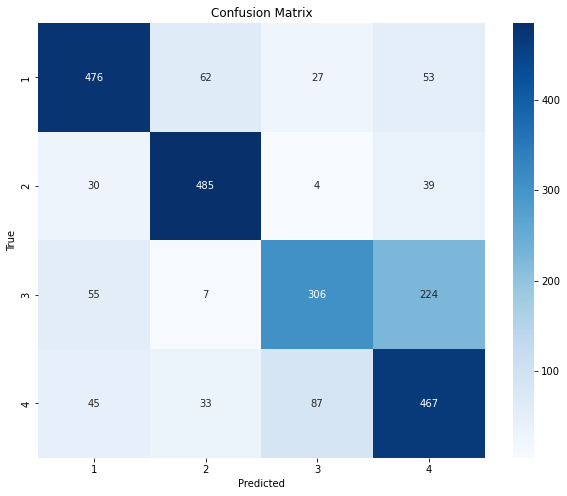

In [36]:
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

SVM

In [37]:
from sklearn.svm import SVC

# Initialize the SVM classifier with a linear kernel (you can explore other kernels as well)
svm_classifier = SVC(kernel='linear')

# Train the classifier on the training data
svm_classifier.fit(X_train.to_list(), y_train)
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test.to_list())
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred, output_dict=True)
table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]
for label, metrics in report.items():
    if label in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    table.add_row([
        label,
        round(metrics['precision'], 2),
        round(metrics['recall'], 2),
        round(metrics['f1-score'], 2),
        metrics['support']
    ])

print("Classification Report:")
print(table)
print("Accuracy:", round(accuracy, 2))


Accuracy: 0.7945833333333333
Classification Report:
+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   1   |    0.82   |  0.79  |   0.81   |   618   |
|   2   |    0.86   |  0.91  |   0.88   |   558   |
|   3   |    0.78   |  0.73  |   0.75   |   592   |
|   4   |    0.73   |  0.76  |   0.75   |   632   |
+-------+-----------+--------+----------+---------+
Accuracy: 0.79


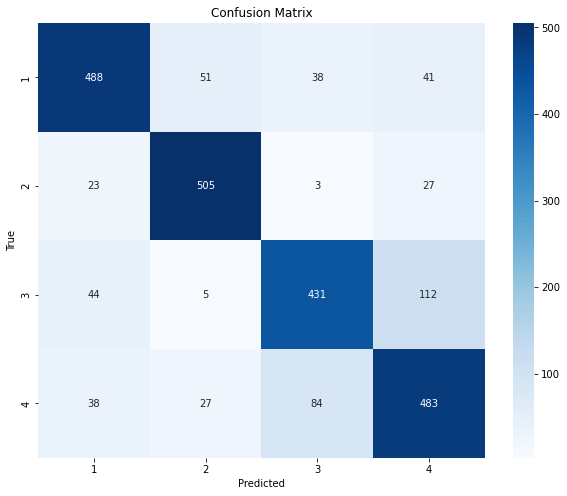

In [38]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

RANDOM FOREST

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train.to_list(), y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test.to_list())

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred, output_dict=True)
table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]
for label, metrics in report.items():
    if label in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    table.add_row([
        label,
        round(metrics['precision'], 2),
        round(metrics['recall'], 2),
        round(metrics['f1-score'], 2),
        metrics['support']
    ])

print("Classification Report:")
print(table)
print("Accuracy:", round(accuracy, 2))



Random Forest Classifier Accuracy: 0.8154166666666667
Classification Report:
+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   1   |    0.85   |  0.8   |   0.83   |   618   |
|   2   |    0.85   |  0.92  |   0.88   |   558   |
|   3   |    0.79   |  0.77  |   0.78   |   592   |
|   4   |    0.77   |  0.78  |   0.77   |   632   |
+-------+-----------+--------+----------+---------+
Accuracy: 0.82


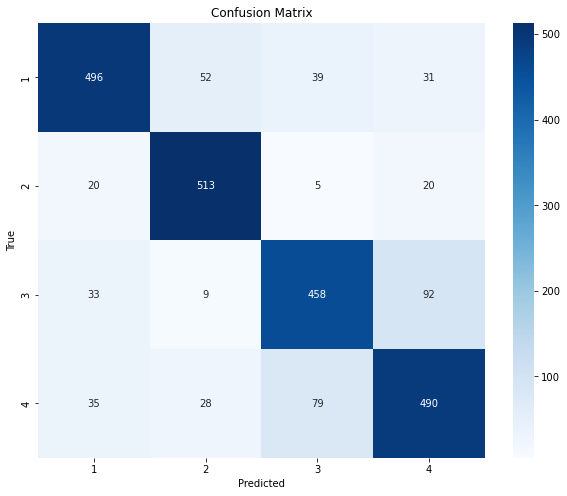

In [40]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Can we do better ?

In [41]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Define the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=2, n_jobs=-1)
grid_search.fit(X_train.to_list(), y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train.to_list(), y_train)

# Make predictions on the test data
y_pred = best_rf_classifier.predict(X_test.to_list())

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred, output_dict=True)
table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]
for label, metrics in report.items():
    if label in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    table.add_row([
        label,
        round(metrics['precision'], 2),
        round(metrics['recall'], 2),
        round(metrics['f1-score'], 2),
        metrics['support']
    ])

print("Classification Report:")
print(table)
print("Accuracy:", round(accuracy, 2))


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Accuracy: 0.8154166666666667
Classification Report:
+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   1   |    0.85   |  0.8   |   0.83   |   618   |
|   2   |    0.85   |  0.92  |   0.88   |   558   |
|   3   |    0.79   |  0.77  |   0.78   |   592   |
|   4   |    0.77   |  0.78  |   0.77   |   632   |
+-------+-----------+--------+----------+---------+
Accuracy: 0.82


Moving on 

CNN

In [42]:
from keras.preprocessing.text import Tokenizer

# Assuming your text data is in a list called 'text_data'
text_data = data['Stemmed_Text'].tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)

# Vocabulary size is the number of unique words in the dataset
vocab_size = len(tokenizer.word_index)
print("Vocabulary Size:", vocab_size)


Vocabulary Size: 15996


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer

# Assuming your data DataFrame contains the columns 'Class Index', 'Stemmed_Text', and 'Document_Embeddings'
X = data['Stemmed_Text']  # Features (Stemmed_Text)
y = data['Class Index']  # Target variable (Class Index)

# Adjust the class indices to start from 0
y_adjusted = y - 1

# Convert to one-hot encoded categorical format
y_categorical = to_categorical(y_adjusted)

# Perform the train-test split with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Tokenize and pad the text data
max_length = max(len(x) for x in X)
vocab_size = 10000  
embedding_dim = 100  
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts([' '.join(x) for x in X_train])
X_train_seq = tokenizer.texts_to_sequences([' '.join(x) for x in X_train])
X_test_seq = tokenizer.texts_to_sequences([' '.join(x) for x in X_test])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Build the CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile the model
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model
model_cnn.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test data
y_pred = model_cnn.predict(X_test_padded)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("CNN Classifier Accuracy:", accuracy)

# Convert back to original labels for classification report
label_encoder = LabelEncoder()
label_encoder.fit(y_adjusted)
y_pred_labels_original = label_encoder.inverse_transform(y_pred_labels)
y_test_labels_original = label_encoder.inverse_transform(y_test_labels)

# Print classification report
report = classification_report(y_test_labels_original, y_pred_labels_original, output_dict=True)
table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]
for label, metrics in report.items():
    if label in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    table.add_row([
        label,
        round(metrics['precision'], 2),
        round(metrics['recall'], 2),
        round(metrics['f1-score'], 2),
        metrics['support']
    ])

print("Classification Report:")
print(table)
print("Accuracy:", round(accuracy, 2))


Epoch 1/5
240/240 [==============================] - 18s 69ms/step - loss: 0.7381 - accuracy: 0.7387 - val_loss: 0.3696 - val_accuracy: 0.8766
Epoch 2/5
240/240 [==============================] - 17s 70ms/step - loss: 0.2058 - accuracy: 0.9339 - val_loss: 0.3732 - val_accuracy: 0.8750
Epoch 3/5
240/240 [==============================] - 17s 72ms/step - loss: 0.0747 - accuracy: 0.9780 - val_loss: 0.4078 - val_accuracy: 0.8724
Epoch 4/5
240/240 [==============================] - 17s 70ms/step - loss: 0.0317 - accuracy: 0.9913 - val_loss: 0.4566 - val_accuracy: 0.8740
Epoch 5/5
75/75 [==============================] - 1s 15ms/step
CNN Classifier Accuracy: 0.8570833333333333
Classification Report:
+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   0   |    0.82   |  0.87  |   0.85   |   618   |
|   1   |    0.9    |  0.95  |   0.93   |   558   |
|   2   |    0.81   |  0.84  |   0.82

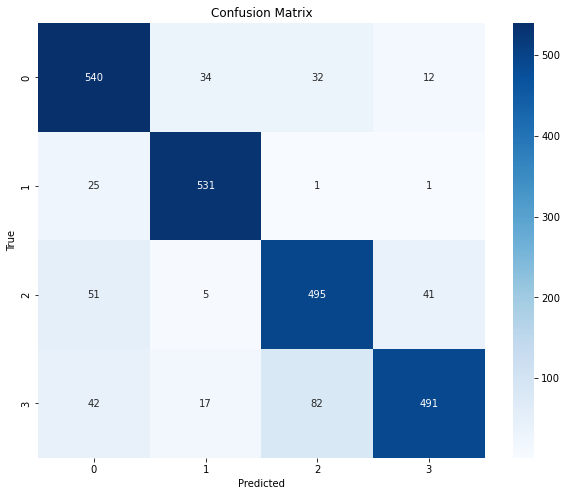

In [44]:
cm = confusion_matrix(y_test_labels_original, y_pred_labels_original)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [62]:
# Define a function to preprocess the input text
def preprocess_text(text):
    # Replace special characters, numbers, and punctuation marks with spaces
    text = ''.join([c if c.isalpha() else ' ' for c in text])
    # Convert to lowercase
    text = text.lower()
    # Tokenize with nltk
    nltk.download('punkt')
    words = nltk.word_tokenize(text)
    # Remove stop words with nltk
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Stem with nltk
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    # Join the processed words
    processed_text = ' '.join(words)
    return processed_text

# Create a dictionary to map class indices to class labels
class_dict = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}

# Function to get class label from the model prediction
def get_class_label(text):
    # Preprocess the text
    preprocessed_text = preprocess_text(text)
    # Convert the preprocessed text to sequences using the tokenizer
    seq = tokenizer.texts_to_sequences([preprocessed_text])
    # Pad the sequence
    padded_seq = pad_sequences(seq, maxlen=max_length, padding='post')
    # Make prediction using the trained CNN model
    prediction = model_cnn.predict(padded_seq)
    # Get the class index with highest probability
    class_index = np.argmax(prediction)
    # Get the class label from the dictionary
    class_label = class_dict[class_index]
    return class_label

# Test the function with an example text
example_text = "Storage, servers bruise HP earnings","update Earnings per share rise compared with a year ago, but company misses analysts' expectations by a long shot."
predicted_class = get_class_label(example_text)
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 47ms/step
Predicted Class: World


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import gradio as gr

# Create the Gradio interface
gr_interface = gr.Interface(fn=get_class_label, 
                            inputs=gr.Textbox(textarea=False, placeholder="Enter your text here..."),
                            outputs=gr.Label())

# Launch the interface
gr_interface.launch(share=True)


C:\Users\Admin\AppData\Local\Temp/ipykernel_7668/792105426.py:5: UserWarning: You have unused kwarg parameters in Textbox, please remove them: {'textarea': False}
  inputs=gr.Textbox(textarea=False, placeholder="Enter your text here..."),


Running on local URL:  http://127.0.0.1:7860


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1/1 [==============================] - 0s 87ms/step


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1/1 [==============================] - 0s 56ms/step


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1/1 [==============================] - ETA: 0s

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1/1 [==============================] - 0s 62ms/step


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1/1 [==============================] - 0s 71ms/step
